# Individual Planning Report

In [33]:
library(tidyverse)

## Data Description

In [162]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

glimpse(players)
glimpse(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+

- **Players:**
    - Number of Observations: 196
    - Number of Variables: 7

| Name of Variable | Type of Variable | Meaning of Varibles | Possible Issues |
|-----------------|-----------------|-------------------|----------------|
| Age | Double | Displays the age of the player | Type may need to be changed to type Integer to optimize for memory, data may need to be standardized to account for outliers |
| Gender | Character | Displays the gender of the player | |
| Name | Character | Displays the name of the player | |
| Played Hours | Double | Displays the amount of time the player has spent playing the games | There seem to be outliers which may skew results hence data may need to be standardized |
| Hashed Email | Character | Displays the email address of the player, hashed out for privacy purposes | |
| Subscribe | Logical | Displays whether the player is subscribed to a game-related newsletter or not | |
| Experience | Character | Displays the level the player is at in the game (Beginner, Amateur, Regular, Pro, Veteran) | |

- **Sessions:**
    - Number of Observations: 1535
    - Number of Variables: 5

| Name of Variable     | Type of Variable | Meaning of Variables                                                                                  | Possible Issues                                                                                          |
|---------------------|-----------------|----------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------|
| Start Time           | Character       | Displays the time at which a player started playing the game on a certain date (which is also displayed here) | Type may need to be changed to data/time format to utilize effectively OR it may need to be separated into different columns as we tidy our data |
| End Time             | Character       | Displays the time at which a player ended playing the game on a certain date (which is also displayed here) | Type may need to be changed to data/time format to utilize effectively OR it may need to be separated into different columns as we tidy our data |
| Original Start Time  | Double          | Displays the start time in UNIX time (milliseconds)                                               | Data may need to be changed to a more readable form                                                     |
| Original End Time    | Double          |  Displays the end time in UNIX time (milliseconds)                                               | Data may need to be changed to a more readable form                                                     |
| Hashed Email         | Character       | Displays the email address of the player, hashed out for privacy purposes                        |                                                                                                         |



## Questions

**Broad Question:** 
- Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?
  
**Specific Question:** 
- Can age, gender, experience level and played hours predict whether a player subscribes to a game-related newsletter?

**Describe clearly how the data will help you address the question of interest. You may need to describe how you plan to wrangle your data to get it into a form where you can apply one of the predictive methods from this class.**
- The players.csv dataset will be used in order to address this question of interest. It contains the explanatory variables we are focusing on, which are age, gender, experience, and hours played as well as our response variable which is whether a player subscribes to a newsletter or not. Since, the broad questions mentioned both characteristics and behaviors, we can choose these four explanatory variables to answer both sides of the question, and give an accurate representation of whether a player subscribes to the newsletter or not. In order to correctly utilize these variables, I would need to change the type of age from double to integer, and standardize the age and played hours variables to manage the effects of any outliers.


## Exploratory Data Analysis and Visualization

Mean_Ages,Mean_Played_Hours
<dbl>,<dbl>
21.13918,5.845918


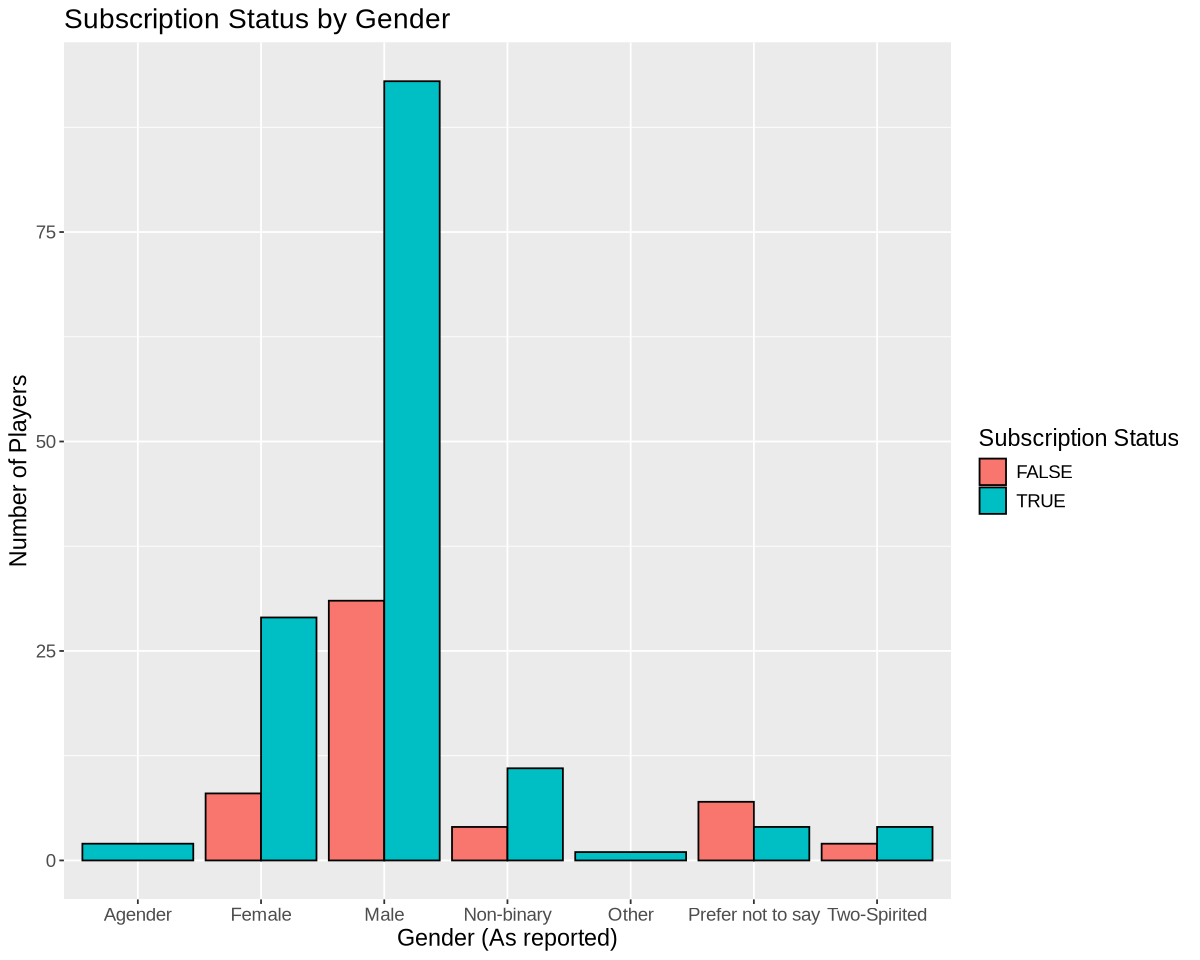

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


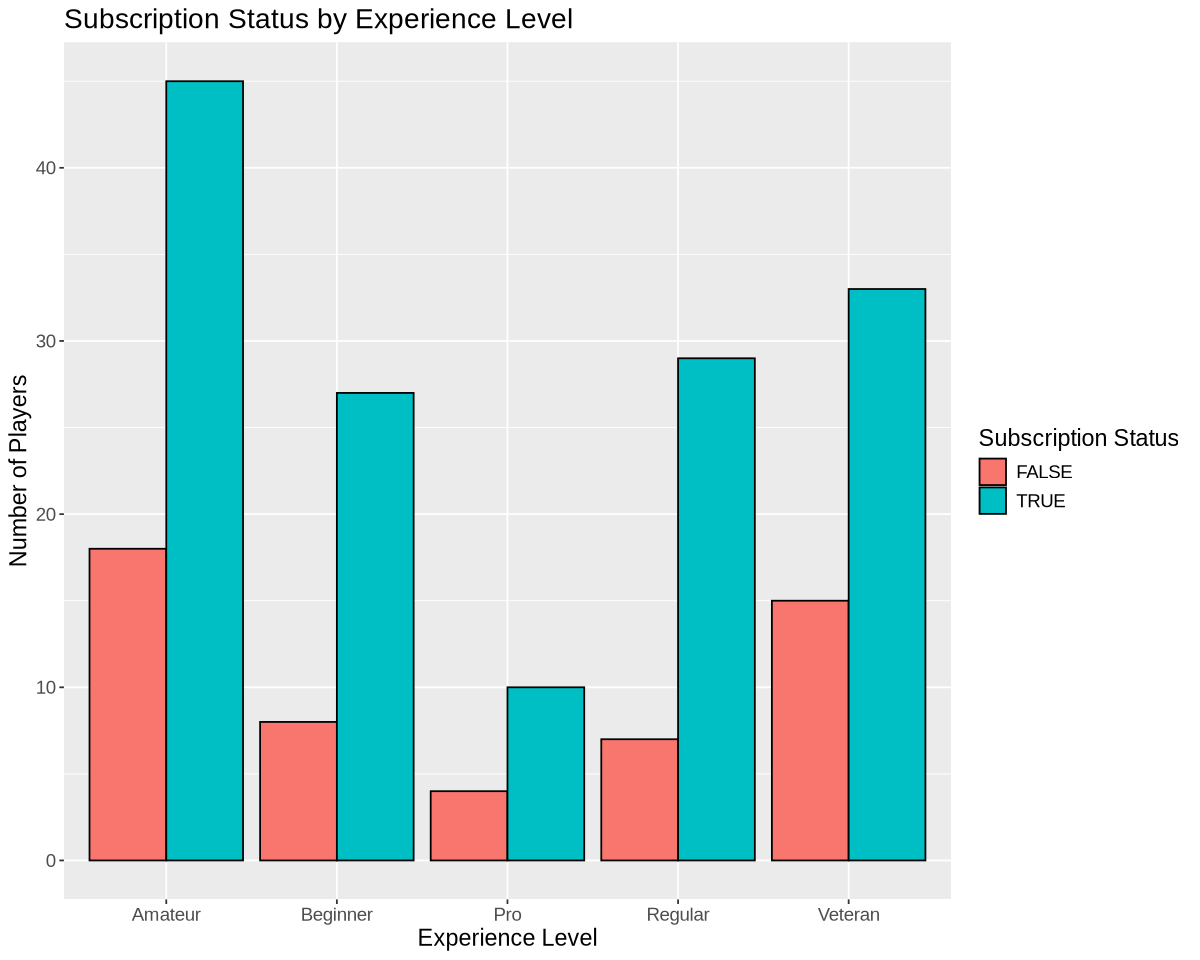

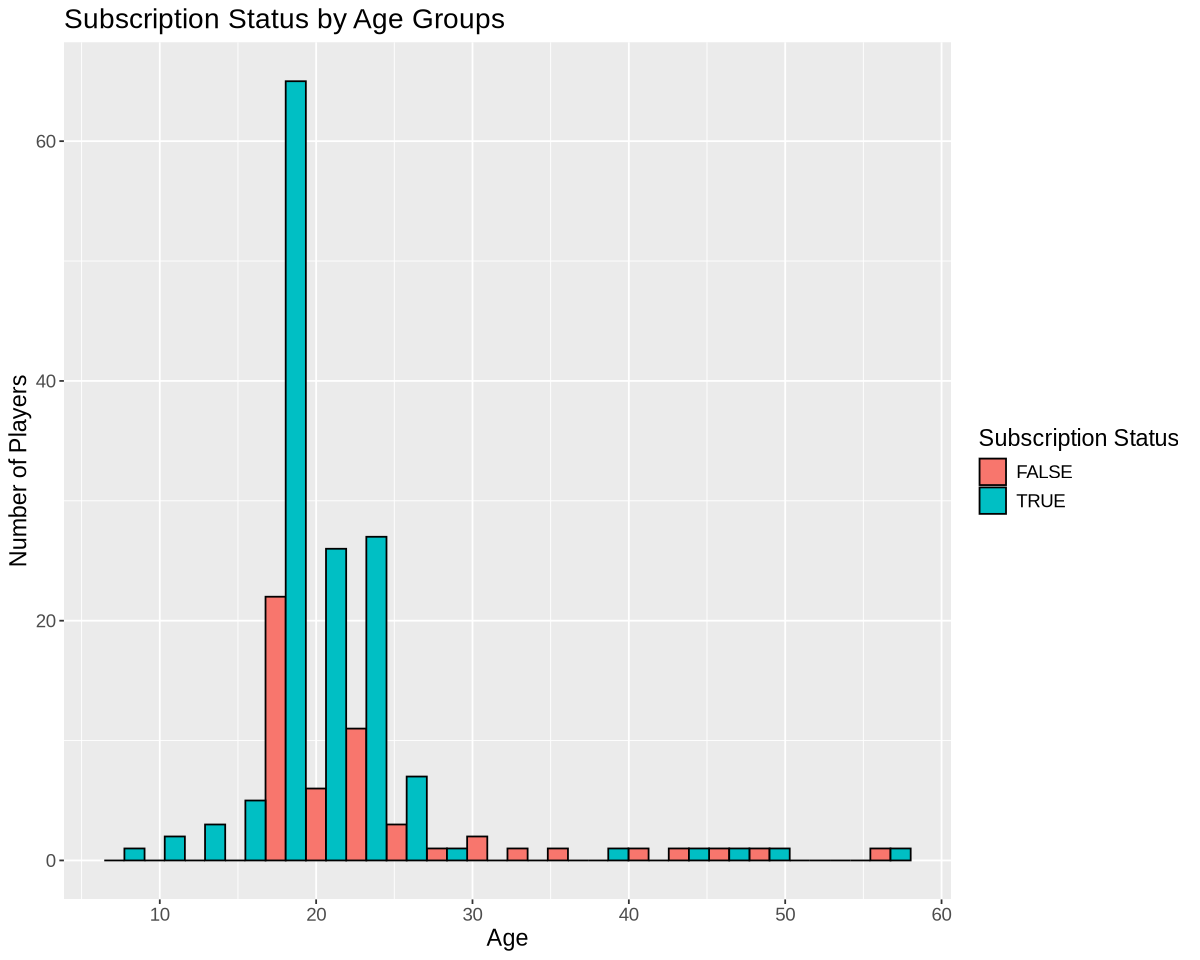

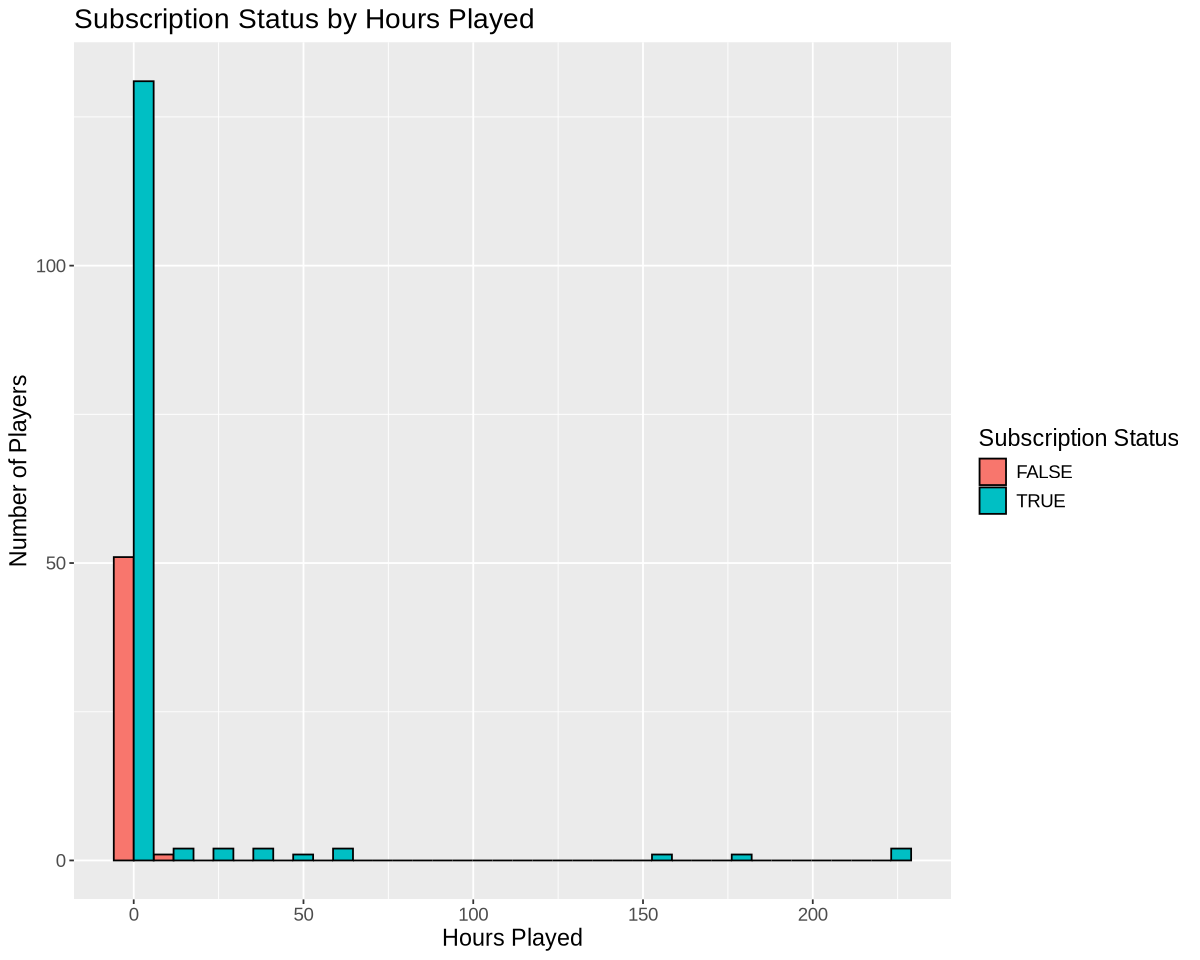

In [161]:
## Clean players - manage types
players_clean <- players |>
mutate(Age = as.integer(Age))

## Mean Values for each quantitative variable in the players.csv data set
players_mean <- players_clean |>
select(Age, played_hours) |>
summarize(Mean_Ages = mean(Age, na.rm = TRUE), Mean_Played_Hours = mean(played_hours, na.rm = TRUE))


## VISUALIZATIONS (FOUR)

## GENDER NON-RATIO
options(repr.plot.width = 10, repr.plot.height = 8) 

Gender_Subs <- players_clean  |>
     ggplot(aes(x = gender, fill = subscribe)) +
     geom_bar(position = "dodge", color = "black") +
     labs(title = "Subscription Status by Gender", x = "Gender (As reported)", y = "Number of Players", fill = "Subscription Status") +
     theme(text = element_text(size = 14))

## EXPERIENCE
options(repr.plot.width = 10, repr.plot.height = 8) 

Experience_Subs <- players_clean  |>
    ggplot(aes(x = experience, fill = subscribe)) +
    geom_bar(position = "dodge", color = "black") +
    labs(title = "Subscription Status by Experience Level", x = "Experience Level", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## AGE
options(repr.plot.width = 10, repr.plot.height = 8) 

Age_Subs <- players_clean  |>
    ggplot(aes(x = Age, fill = subscribe)) +
    geom_histogram(bins = 20, position = "dodge", color = "black") +
    labs(title = "Subscription Status by Age Groups", x = "Age", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## HOURS PLAYED
options(repr.plot.width = 10, repr.plot.height = 8) 

Played_Hours_Subs <- players_clean  |>
    ggplot(aes(x = played_hours, fill = subscribe)) +
    geom_histogram(bins = 20, position = "dodge", color = "black") +
    labs(title = "Subscription Status by Hours Played", x = "Hours Played", y = "Number of Players", fill = "Subscription Status") +
    theme(text = element_text(size = 14))

## Mean Table, Visualization outputs
players_mean

Gender_Subs
Experience_Subs
Age_Subs
Played_Hours_Subs

**Subscription Status by Gender**

This graph clearly shows that the majority of players in this data set are male, and hence also make up the largest share of both subscribers and non-subscribers. In order to better analyze/add to this relationship, I would find the rates of subscription and compare those alongside this in order to reach a stronger conclusion.

**Subscription Status by Experience Level**

As depicted in the graph, amateur players and regular players make up the majority of the players, and hence also make up the largest group of subscriptions (lead by amateur players). Pro players are less frequent overall, and also show lower subscription counts. As with gender, I would use this insight to look at the rates/ratios of subscription more thoroughly.

**Subscription Status by Age Groups**

This graph shows that the majority of players fall between the ages of 10-30 and those players are also the ones with the highest subscription count, especially in the 16-19 age group. As with the previous two graphs, I would look at the rates/ratios to address the question more directly.

**Subscription Status by Hours Played**

This graph shows a very left-skewed distribution with many outliers significantly affecting the plotting. Since most of the data is on the lower side, it is difficult to see any sort of relationship, however, we can infer that if hours played are significantly higher, then the player would most likely be subscribed to the newsletter.


## Methods and Plan

I would use KNN classification to answer my research question. KNN does not generally make any assumptions about the data and can use any sort of data to sort our response variable categorically. In order to apply my data correctly, it will need to be scaled so that one variable does not dominate over the rest. Once that is done, the data will be split into training and testing sets (70% and 30%), on which we can use cross-validation to select the best value of K.

Limitations/weaknesses:
- Results are heavily influenced by the choice of K value.
- Variables must be scaled and standardized appropriately in order to generate appropriate results.
- It can become very slow as the training data gets larger.
- It might not perform well with a larger number of predictors.
- If classes are not balanced appropriately, it may not perform well.